In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-27 15:56:06.877910


<h2>Useamman selittäjän lineaarinen regressio</h2>

Koneoppimisen mallit löytyvät sklearn-kirjastosta (scikit-learn). Lue lisää https://scikit-learn.org/stable/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tuon lineaarisen regressiomallin
from sklearn.linear_model import LinearRegression

# Perinteisempään regressio-statistiikkaan tarvitaan statsmodels-kirjastoa
import statsmodels.api as sm

%matplotlib inline

In [3]:
# Avaan datan (kesämökkien hintoja tuhansina euroina)
df = pd.read_excel('http://taanila.fi/mokki.xlsx')
df

,nro,ranta,pinta-ala,sähkö,hinta
0,1,30,50,0,95
1,2,35,42,0,95
2,3,40,25,1,80
3,4,50,30,1,100
4,5,55,45,0,135
5,6,60,24,1,100
6,7,60,60,1,210
7,8,70,34,1,160
8,9,80,32,0,150
9,10,85,28,0,150


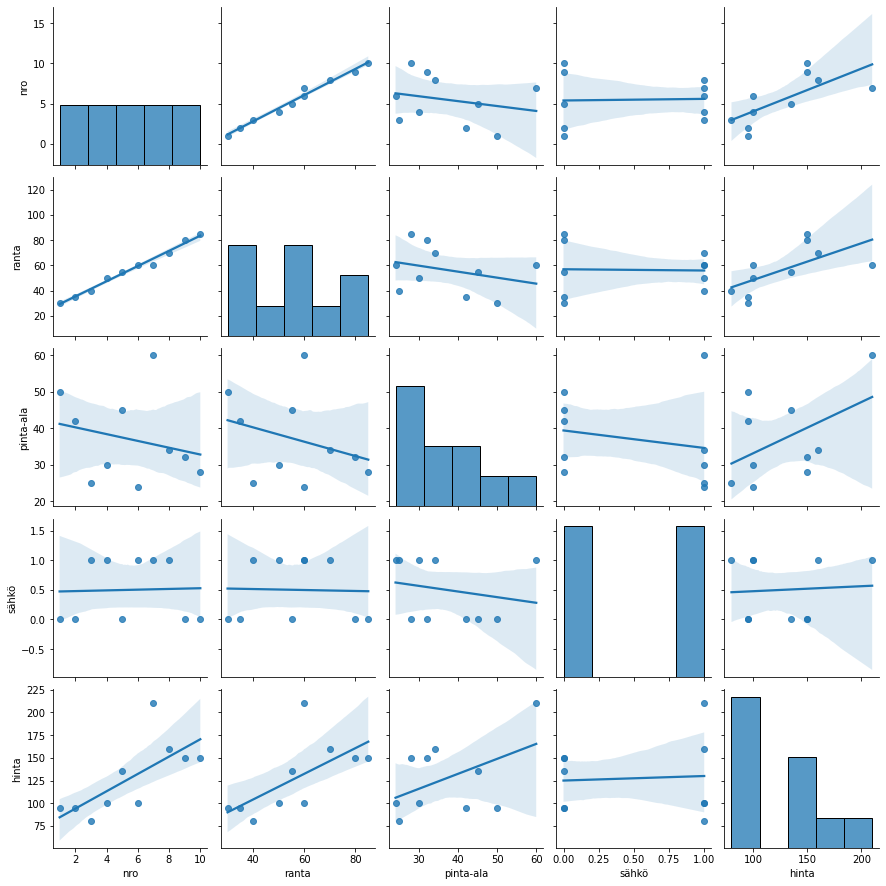

In [4]:
# Riippuvuuksien tarkastelua seaborn-kirjaston hajontakaavioina
sns.pairplot(df, kind='reg')

<AxesSubplot:>

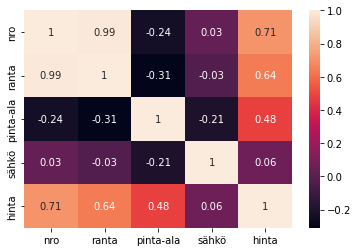

In [5]:
# Riippuvuuksien tarkastelua korrelaatiokertoimien avulla
correlation_matrix = df.corr().round(2)

# Korrelaatioiden taustaväri seaborn-kirjaston heatmap-funktiolla
sns.heatmap(data=correlation_matrix, annot=True)

In [6]:
# Selittävät muuttujat
X = df[['ranta', 'pinta-ala', 'sähkö']]

# Selitettävä/ennustettava muuttuja
y = df['hinta']

In [7]:
# Sovitan mallin dataan
malli = LinearRegression().fit(X,y)

In [8]:
malli.coef_ # regressiosuoran kulmakerroin

array([ 1.9750098 ,  2.77578415, 20.29877373])

In [9]:
malli.intercept_ # regressiosuoran vakiotermi

-96.94145434036429

In [10]:
malli.score(X,y) 
# Selityskertoimen mukaan yli 98 % hintojen vaihtelusta voidaan selittää selittävillä muuttujilla

0.9819136190845802

Text(0, 0.5, 'Poikkeama todellisesta')

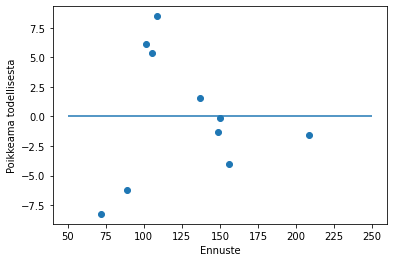

In [11]:
# Mallin virhetermit pistekaaviona
plt.scatter(malli.predict(X), malli.predict(X)-y)

# Vaakaviiva nollapoikkeaman kohdalle
plt.hlines(y=0,xmin=50,xmax=250)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

# On hyvä jos virheet vaihtelevat sattumanvaraisesti nollan molemmin puolin

Text(0, 0.5, 'Ennuste')

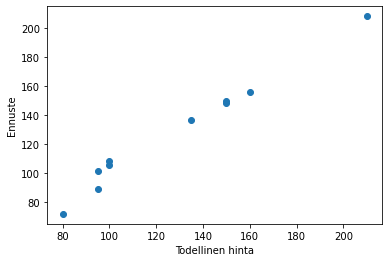

In [12]:
# Todellisen hinnan ja mallin antamien ennusteiden vastaavuus pistekaaviona
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen hinta')
plt.ylabel('Ennuste')

# On hyvä jos pisteet seuraavat suoraa viivaa vasemmasta alakulmasta oikeaan yläkulmaan

In [13]:
# Avaan uuden datan, jossa samat muuttujat kuin selittävinä muuttujina
Xuudet = pd.read_excel('http://taanila.fi/mokkinew.xlsx')
Xuudet

,ranta,pinta-ala,sähkö
0,100,90,1
1,60,56,1
2,30,25,0
3,50,30,0


In [14]:
# Hintaennusteet
Xuudet['Hintaennuste'] = malli.predict(Xuudet)
Xuudet

,ranta,pinta-ala,sähkö,Hintaennuste
0,100,90,1,370.678873
1,60,56,1,197.301820
2,30,25,0,31.703444
3,50,30,0,85.082560


In [15]:
# Perinteisempi regressio-statistiikka statsmodels-kirjastosta

# Seuraava rivi tarvitaan, jotta malliin lasketaan vakiotermi
X = sm.add_constant(X)

# Mallin sovitus (OLS = Ordinary Least Squares)
malli_sm = sm.OLS(y, X).fit()

print(malli_sm.summary())

# Kannattaa tarkistaa selittäviin muuttujiin liittyvät p-arvot P>|t| -sarakkeesta
# On hyvä jos p-arvot ovat pienempiä kuin 0.05

                            OLS Regression Results                            
Dep. Variable:                  hinta   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.29e-05
Time:                        15:56:14   Log-Likelihood:                -30.630
No. Observations:                  10   AIC:                             69.26
Df Residuals:                       6   BIC:                             70.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -96.9415     12.767     -7.593      0.0

C:\Users\Aki\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Aki\anaconda3\envs\env1\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/